In [1]:
# Scientific libraries
import numpy_html
import numpy as np
import scipy.stats as stats
import scipy.special as sf
import scipy.integrate as integrate
import scipy.interpolate as interpolate

# import Pandas

import pandas as pd
import astropy.io.fits as fits
import astropy.units as u
import astropy.constants as const

# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib notebook
from jupyterthemes import jtplot
plt.style.use('mike_dark') 
jtplot.style(context='notebook', fscale=1, grid=False)

from glob import glob
import copy
import collections
#import warnings
#warnings.simplefilter('ignore')

import stan_utility

green = "#1DEBA6"
red = "#FF0059"
yellow = "#F6EF5B"


from pyipn import copy_template, Universe

In [2]:
#copy_template()

In [6]:
def cos_sin_features(k, time, omega, bw):
    
    features = np.matmul(np.atleast_2d(time).T , np.atleast_2d(omega)) *bw
    cos_features = np.zeros((len(time), k))
    sin_features = np.zeros((len(time), k))
    
    
    scale = np.sqrt(2./k)

        
    for i in range(len(time)):
        for j in range(k):

            cos_features[i,j] = np.cos(features[i, j])
            sin_features[i,j] = np.sin(features[i, j])
            
    return cos_features * scale, sin_features*scale


def func(cosf, sinf, beta1, beta2):
    
    return np.exp(np.dot(beta1, cosf.T) +np.dot(beta2, sinf.T))
    
def time_filter(time, start, stop, strength):
    
    
    
    return sf.expit( strength*(time-start)  ) * (1 -sf.expit( strength*(time- stop)  ) )
    

<IPython.core.display.Javascript object>


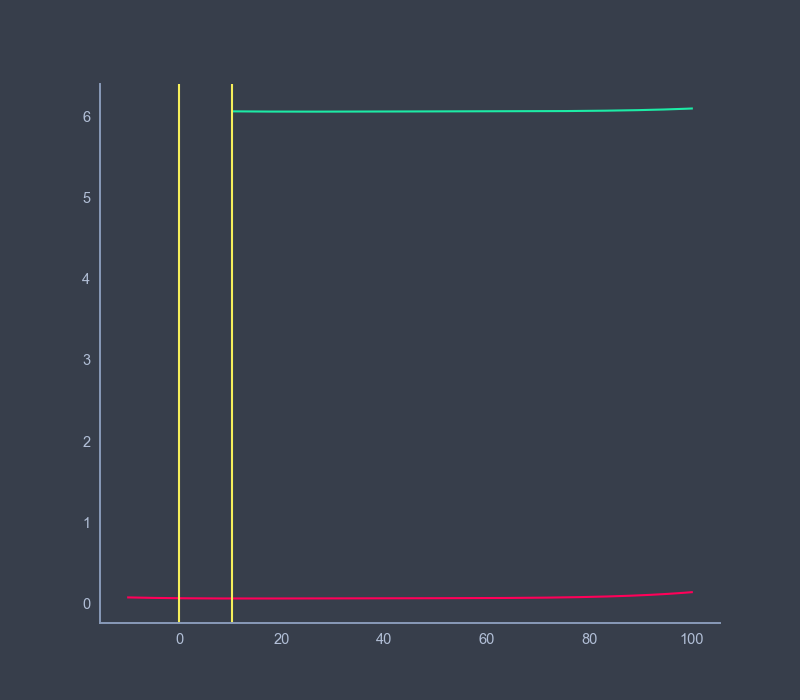

In [18]:
fig, ax = plt.subplots()
k = 50
beta1 = np.random.randn(k)
beta2 = np.random.randn(k)
time = np.linspace(-10,100,500)

start = 0
stop =20
strength = 100
bw=.02
omega=np.random.randn(k)


dt = 10.3

cosf, sinf = cos_sin_features(k, time, omega, bw=bw)

ax.plot(time, func(cosf, sinf, beta1, beta2), color=red)





cosf, sinf = cos_sin_features(k, time - dt, omega, bw=bw)


idx = time > dt

ax.plot(time[idx], 6 + func(cosf, sinf, beta1, beta2)[idx], color=green)


ax.axvline(0,color=yellow)

ax.axvline(0 + dt,color=yellow)